<p><img alt="Colaboratory logo" height="45px" src="https://www.quantreo.com/wp-content/uploads/2021/10/Original-on-Transparent.png" align="left" hspace="10px" vspace="0px"></p>

# Your first forex algorithmic trading strategies

### Summary
* Manage the data
* Bollingers Bands
* Trading Strategy
* Verification
* Profits
* Automatization
* Forex portfolio application

<br>


📈Join our community: https://discord.gg/wXjNPAc5BH

📚Read our book: https://www.amazon.com/gp/product/B09HG18CYL 

🖥️Quantreo's YouTube channel: https://www.youtube.com/channel/UCp7jckfiEglNf_Gj62VR0pw

In [ ]:
!pip install ta

  Created wheel for ta: filename=ta-0.9.0-py3-none-any.whl size=28908 sha256=78e129a06a5a990700ea26357435569382c9dbf3c30e83faeddb2e5ca4678dc6
  Stored in directory: /root/.cache/pip/wheels/72/78/64/cc1c01506a1010a9845e9bd7c69333730f7174661228ea4f98
Successfully built ta


In [ ]:
import numpy as np
import pandas as pd
from ta.volatility import BollingerBands
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# The code here will allow you to switch your graphics to dark mode for those who choose to code in dark mode
import matplotlib.pyplot as plt

import matplotlib as mpl
from matplotlib import cycler
colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")

# Manage the data

In [ ]:
# Import brut data
df = pd.read_csv("GBPUSD_D1.csv")
df

,<DATE>\t<OPEN>\t<HIGH>\t<LOW>\t<CLOSE>\t<TICKVOL>\t<VOL>\t<SPREAD>
0,2011.01.03\t1.55431\t1.55744\t1.54329\t1.54794...
1,2011.01.04\t1.54793\t1.56448\t1.54535\t1.55960...
2,2011.01.05\t1.55958\t1.56266\t1.54502\t1.55030...
3,2011.01.06\t1.55035\t1.55609\t1.54454\t1.54568...
4,2011.01.07\t1.54580\t1.55781\t1.54057\t1.55457...
...,...
2861,2022.01.10\t1.35664\t1.36036\t1.35321\t1.35761...
2862,2022.01.11\t1.35746\t1.36358\t1.35609\t1.36340...
2863,2022.01.12\t1.36330\t1.37142\t1.36206\t1.37004...
2864,2022.01.13\t1.37003\t1.37489\t1.36984\t1.37051...


In [ ]:
# Add the delimiter
df = pd.read_csv("GBPUSD_D1.csv", delimiter="\t")
df

,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,2011.01.03,1.55431,1.55744,1.54329,1.54794,73002,0,15
1,2011.01.04,1.54793,1.56448,1.54535,1.55960,88459,0,15
2,2011.01.05,1.55958,1.56266,1.54502,1.55030,90844,0,15
3,2011.01.06,1.55035,1.55609,1.54454,1.54568,84543,0,15
4,2011.01.07,1.54580,1.55781,1.54057,1.55457,91983,0,15
...,...,...,...,...,...,...,...,...
2861,2022.01.10,1.35664,1.36036,1.35321,1.35761,52787,0,0
2862,2022.01.11,1.35746,1.36358,1.35609,1.36340,53876,0,0
2863,2022.01.12,1.36330,1.37142,1.36206,1.37004,50043,0,0
2864,2022.01.13,1.37003,1.37489,1.36984,1.37051,51844,0,0


In [ ]:
# Preprocessing function
def preprocessing(name):

  #Improt the data
  df = pd.read_csv(name, delimiter="\t", index_col="<DATE>", parse_dates=True)

  # Delete the two last columns
  df = df.iloc[:,:-2]

  #Rename
  df.columns = ["open", "high", "low", "close", "volume"]
  df.index.name = "time" 
  return df

preprocessing("GBPUSD_D1.csv")

,open,high,low,close,volume
time,,,,,
2011-01-03,1.55431,1.55744,1.54329,1.54794,73002
2011-01-04,1.54793,1.56448,1.54535,1.55960,88459
2011-01-05,1.55958,1.56266,1.54502,1.55030,90844
2011-01-06,1.55035,1.55609,1.54454,1.54568,84543
2011-01-07,1.54580,1.55781,1.54057,1.55457,91983
...,...,...,...,...,...
2022-01-10,1.35664,1.36036,1.35321,1.35761,52787
2022-01-11,1.35746,1.36358,1.35609,1.36340,53876
2022-01-12,1.36330,1.37142,1.36206,1.37004,50043


In [ ]:
df = preprocessing("GBPUSD_D1.csv")

# Bollinger Bands

In [ ]:
# Initialize BB class
indicator_bb = BollingerBands(close=df["close"], window=30, window_dev=2)

# Add Bollinger Bands features
df["bbl"] = indicator_bb.bollinger_lband()
df["bbh"] = indicator_bb.bollinger_hband()

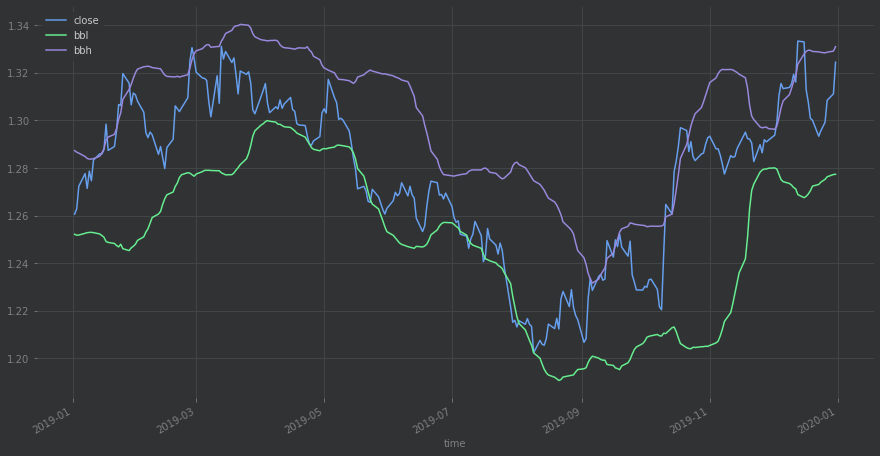

In [ ]:
df[["close", "bbl", "bbh"]].loc["2019"].plot(figsize=(15,8))

# Strategy

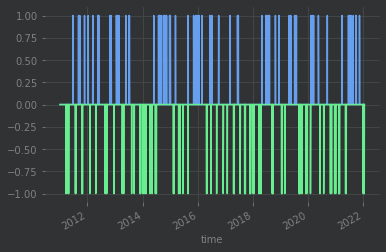

In [ ]:
# Create yersteday price
df["close yersteday"] = df["close"].shift(1)
df["bbh yersteday"] = df["bbh"].shift(1)
df["bbl yersteday"] = df["bbl"].shift(1)


# Initialize the signals
df["signal_buy"] = np.nan
df["signal_sell"] = np.nan

# Sell signal
df.loc[(df["close yersteday"] < df["bbh yersteday"]) &\
       (df["close"] > df["bbh"]), "signal_sell"] = -1

# Buy signal 
df.loc[(df["close yersteday"] > df["bbl yersteday"]) &\
       (df["close"] < df["bbl"]), "signal_buy"] = 1

# Display the signals
df["signal_buy"].fillna(value=0).plot()
df["signal_sell"].fillna(value=0).plot()

# Verification

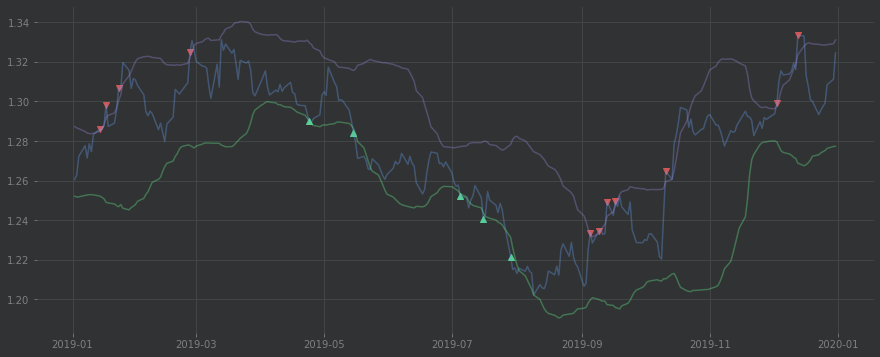

In [ ]:
# We plot all the signl to be sure that they be correct
year="2019"

# Select all signal in a index list to plot only this points
idx_buy = df.loc[df["signal_buy"] == 1].loc[year].index
idx_sell = df.loc[df["signal_sell"] == -1].loc[year].index

# Adapt the size of the graph
plt.figure(figsize=(15,6))

# Plot the points of the open long signal in green
plt.scatter(df.loc[idx_buy].loc[year].index, df.loc[idx_buy]["close"].loc[year], color= "#57CE95", marker="^")

# Plot the points of the open sell signal in red
plt.scatter(df.loc[idx_sell].loc[year].index, df.loc[idx_sell]["close"].loc[year], color= "#CE5757", marker="v")


plt.plot(df["close"].loc[year].index, df["close"].loc[year], alpha=0.35)
plt.plot(df["bbl"].loc[year].index, df["bbl"].loc[year], alpha=0.35)
plt.plot(df["bbh"].loc[year].index, df["bbh"].loc[year], alpha=0.35)



# Show the graph
plt.show()

# Profits

In [ ]:
df["position"] = (df["signal_buy"].fillna(value=0) + df["signal_sell"].fillna(value=0))

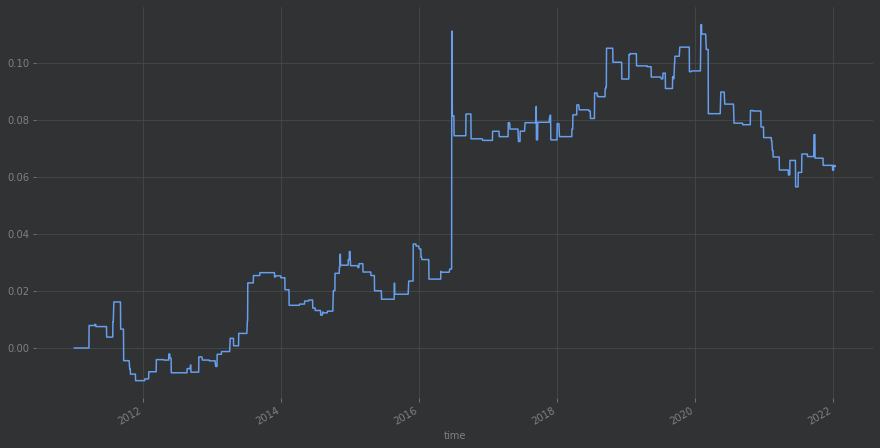

In [ ]:
# Compute the percentage of variation of the asset
df["pct"] = df["close"].pct_change(1)

# Compute the return of the strategy
df["return"] = df["pct"] * df["position"].shift(1)

df["return"].cumsum().plot(figsize=(15,8))

# Automatisation

In [ ]:
def bollinger(name, mean_window, std_window, train=False, duration=5):
  def preprocessing(name):
  
    # Import the data
    df = pd.read_csv(name, delimiter="\t", index_col="<DATE>", parse_dates=True)

    # Delete the two last columns
    df = df.iloc[:,:-2]

    # Rename
    df.columns = ["open", "high", "low", "close", "volume"]
    df.index.name = "time"

    return df.dropna()

  df = preprocessing(name)
  
  split = int(0.50*len(df))
  
  # Initialize BB class
  indicator_bb = BollingerBands(close=df["close"], window=mean_window, window_dev=std_window)

  # Add Bollinger Bands features
  df["bbl"] = indicator_bb.bollinger_lband()
  df["bbh"] = indicator_bb.bollinger_hband()

  df["close yersteday"] = df["close"].shift(1)
  df["bbh yersteday"] = df["bbh"].shift(1)
  df["bbl yersteday"] = df["bbl"].shift(1)

  df["signal_buy"] = np.nan
  df["signal_sell"] = np.nan

  df.loc[(df["close yersteday"] < df["bbh yersteday"]) &\
        (df["close"] > df["bbh"]), "signal_buy"] = -1

  df.loc[(df["close yersteday"] > df["bbl yersteday"]) &\
        (df["close"] < df["bbl"]), "signal_sell"] = 1

  df["position"] = (df["signal_buy"].fillna(value=0) + df["signal_sell"].fillna(value=0))

  # Compute the percentage of variation of the asset
  df["pct"] = df["close"].pct_change(1)

  # Compute the return of the strategy
  df["return"] = np.array([df["pct"].shift(i) for i in range(duration)]).sum(axis=0) * (df["position"].shift(duration))

  if train:
    return df["return"].iloc[:split]
  else:
    return df["return"].iloc[split:]

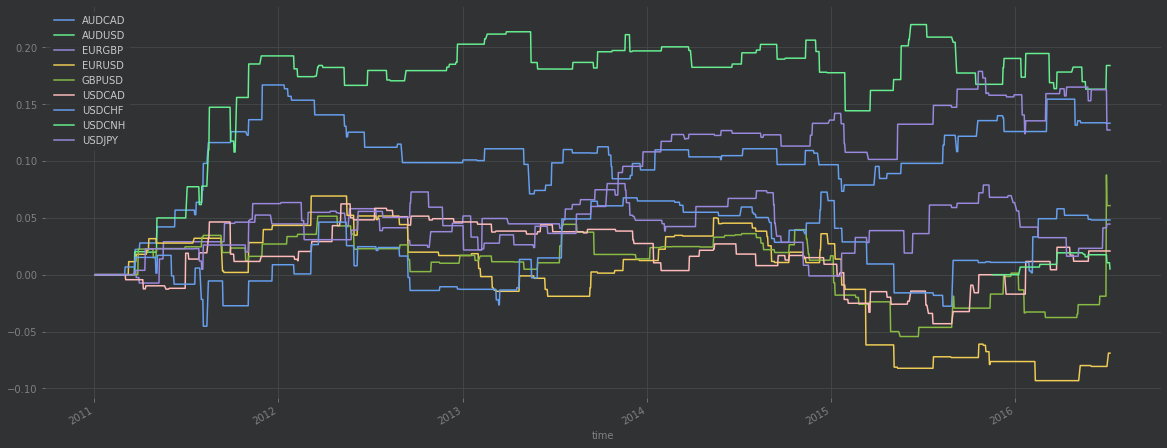

In [ ]:
namelist = ["AUDCAD", "AUDUSD", "EURGBP", "EURUSD",
            "GBPUSD", "USDCAD", "USDCHF", "USDCNH", "USDJPY"]

# Create empty dataframe
dft = pd.DataFrame()

for name in namelist:

  # Create the strategy
  dfc = bollinger(f"{name}_D1.csv",30, 2, train=True, duration=5)

  # Rename return
  dfc.rename = name

  # drop the nan
  dft[name] = dfc.fillna(value=0)


dft.cumsum().plot(figsize=(20,8))

In [ ]:
ret = dft.cumsum().iloc[-1,:]
ret[ret>0.0].index

Index(['AUDCAD', 'AUDUSD', 'EURGBP', 'USDCNH', 'USDJPY'], dtype='object')

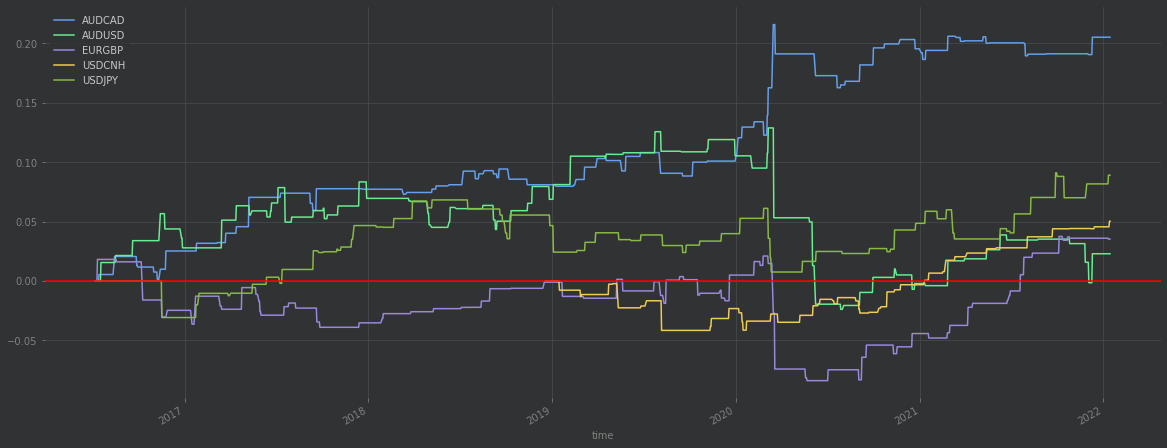

In [ ]:
namelist = ['AUDCAD', 'AUDUSD', 'EURGBP', 'USDCNH', 'USDJPY']

# Create empty dataframe
dft = pd.DataFrame()

for name in namelist:

  # Create the strategy
  dfc = bollinger(f"{name}_D1.csv",30, 2, duration=5)

  # Rename return
  dfc.rename = name

  # drop the nan
  dft[name] = dfc.fillna(value=0)


dft.cumsum().plot(figsize=(20,8))
plt.axhline(0, color="red")

In [ ]:
dft.to_csv("TA.csv")